# 6. 학습 관련 기술들

In [1]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 6.1 매개변수 갱신

- **최적화** : 손실 함수의 값을 가능한 낮추는 매개변수를 찾음. 최적 매개변수를 찾는 문제를 푸는 것.

- **확률적 경사 하강법(SGD)** : 매개변수 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신하여 점점 최적의 매개변수로 다가가는 방법

### 6.1.1 모험가 이야기

**SGD의 전략** : 지금 서있는 장소에서 가장 크게 기울어진 방향으로 가는 것.



### 6.1.2 확률적 경사 하강법 (SGD)

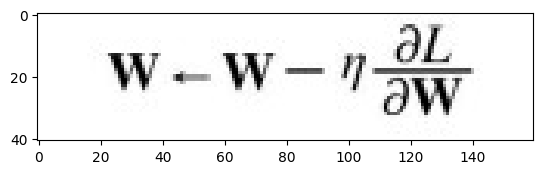

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/가중치매개변수갱신법.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- W : 갱신할 가중치 매개변수
- ∂L/∂W : W에 대한 손실함수의 기울기
- η : 학습률 (0.01이나 0.001과 같은 값으로 미리 정해서 사용)
- ← : 우변의 값으로 좌변의 값을 갱신



**SGD** : 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법

**SGD 파이썬 클래스 구현**

In [5]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

- lr : 학습률 (learning rate), 인스턴스 변수로 유지

- update(params, grads) 메서드 : SGD 과정에서 반복해서 호출됨

1. params : 딕셔너리 변수. 가중치 매개변수 저장됨. 예시 params['W1']

2. grads : 딕셔너리 변수. 기울기가 저장됨. 예시 grads['W1']

**신경망 매개변수 진행 의사코드**


```
network = TwoLayerNet(...)
optimizer = SGD() ###
for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads) ###
    ...
```

- optimizer : 변수. 뜻은 최적화를 행하는 자

→ 매개변수 갱신은 optimizer가 책임지고 수행하므로 optimizer에 매개변수와 기울기 정보만 넘기면 됨.  

→ 최적화를 담당하는 클래스를 분리 구현하면 기능을 모듈화하기 좋음  

→ 모멘텀 최적화 기법 역시 update(params, grads)라는 공통의 메서드를 갖도록 구현  
 optimizer = SGD() 문장을 optimizer = Momentum()으로만 변경하면 됨

※ Lasagne 딥러닝 프레임워크는 최적화 기법을 다음 함수들로 정리함

### 6.1.3 SGD의 단점

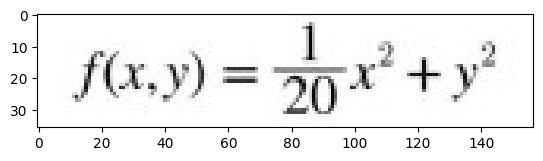

In [6]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/SGD단점.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

함수가 밥그릇을 x축 방향으로 늘인 듯한 모습이고, 실제로는 등고선은 x축 방향으로 늘인 타원으로 되어 있다.

In [9]:
# 그림 6-1 f(x, y) = (1/20) * x**2 + y**2 그래프
# 3차원 참고주소: https://www.datascienceschool.net/view-notebook/6e71dbff254542d9b0a054a7c98b34ec/
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-10, 10, 0.5)
Y = np.arange(-10, 10, 0.5)
XX, YY = np.meshgrid(X, Y)
ZZ = (1 / 20) * XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');

<Figure size 640x480 with 0 Axes>

(-10.0, 10.0)

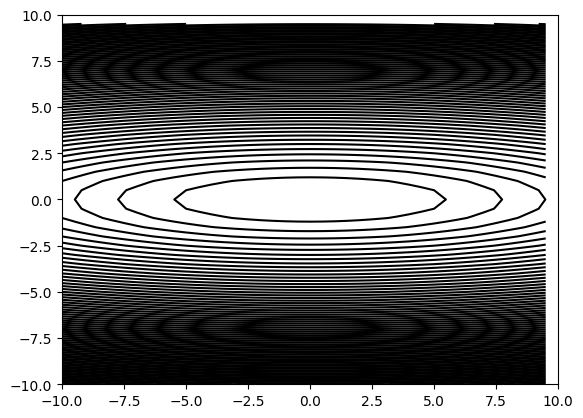

In [10]:
# 그림 6-1 f(x, y) = (1/20) * x**2 + y**2 등고선
plt.contour(XX, YY, ZZ, 100, colors='k')
plt.ylim(-10, 10)
plt.xlim(-10, 10)

**< 기울기 특징 >**

y축 방향은 가파른데 x 축 방향은 완만함.

기울기의 대부분은 (0,0) 방향을 가리키지 않음.

In [11]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

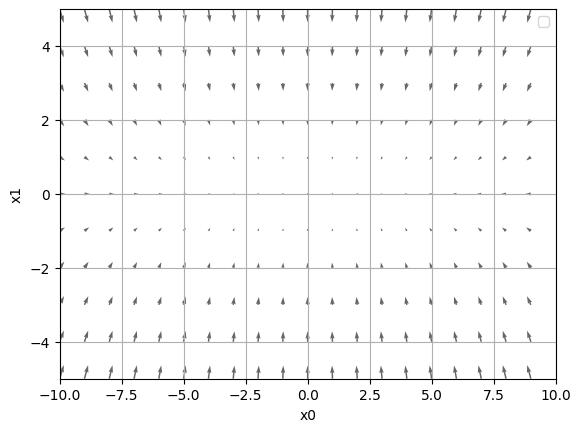

In [12]:
# 그림 6-2 f(x, y) = (1/20) * x**2 + y**2 의 기울기
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py 소스 참고
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
     
x0 = np.arange(-10, 10, 1)
x1 = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([(1/(20**0.5))*X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

SGD 단점 : 비등방성(anisotropy) 함수(방향에 따라 기울기가 달라지는 함수)에서 탐색경로가 비효율적.

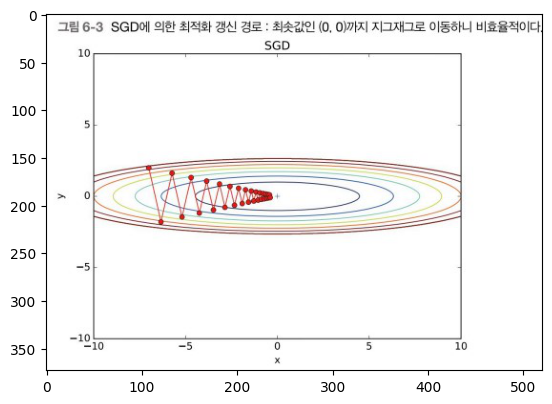

In [13]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/SGD최적화갱신경로.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

SGD는 심하게 굽이진 움직임을 보임. → 비효율적인 움직임  
- 지그재그로 탐색하는 근본 원인  
: 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서

- SGD의 이러한 단점을 해결해주는 방법
1. 모멘텀  
2. AdaGrad
3. Adam

### 6.1.4 모멘텀

- **모멘텀** : Momentum, 운동량

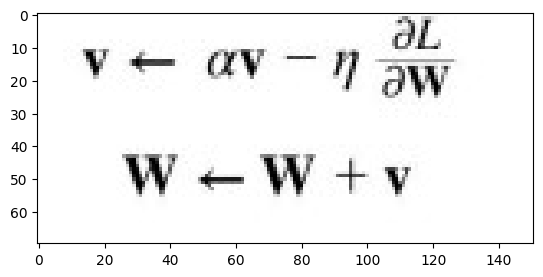

In [15]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/모멘텀식.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- W : 갱신할 가중치 매개변수
- ∂L/∂W : W에 대한 손실함수의 기울기
- η : 학습률
- v : 물리에서 말하는 속도(velocity)
- αv : 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 함  
(α는 0.9 등의 값으로 설정 / 물리에서의 지면 마찰이나 공기저항에 해당됨)

→ 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타냄

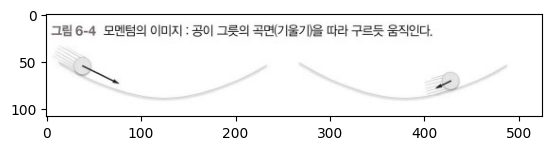

In [16]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/모멘텀이미지.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

**모멘텀의 구현**

In [17]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

인스턴스 변수 v : 물체의 속도

→ v는 초기화 때는 아무것도 담지 않고, update가 처음 호출될 때 같은 구조의 데이터를 딕셔너리 변수로 저장

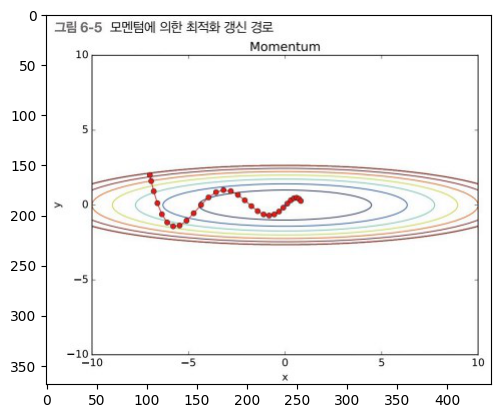

In [18]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/모멘텀최적화갱신경로.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

모멘텀의 갱신경로는 공이 그릇 바닥을 구르듯 움직임

SGD와 비교하면 지그재그 정도가 덜함
- x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문  
→ 거꾸로 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않음  
= 전체적으로는 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어듦 

### 6.1.5 AdaGrad

**< 학습률을 정하는 효과적인 기술 >**

학습률 감소(learning rate decay) : 학습을 진행하면서 학습률을 점차 줄여가는 방법

→ 학습률을 서서히 낮추는 가장 간단한 방법 : 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것

**AdaGrad** : 개별 매개변수에 적응적으로(adative) 학습률을 조정하면서 학습을 진행
→ *각각의* 매개변수에 **맞춤형** 값을 만듦

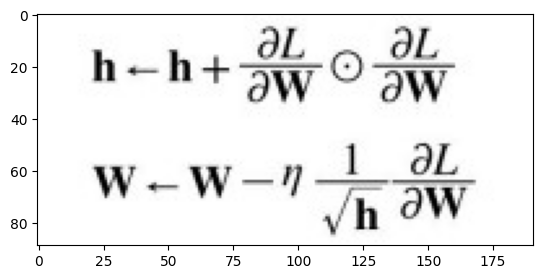

In [20]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/AdaGrad식.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- W : 갱신할 가중치 매개변수
- ∂L/∂W : W에 대한 손실함수의 기울기
- η : 학습률

- h : 기존 기울기 값을 제곱하여 계속 더해줌  
→ 매개변수를 갱신할 때 1/sqrt(h)을 곱해 학습률을 조정

→ 매개변수 원소 중 많이 움직인 (크게 갱신된) 원소는 학습률이 낮아짐  
= 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 의미

AdaGrad는 학습을 진행할 수록 갱신 강도가 약해짐. ← 과거의 기울기를 제곱하여 계속 더해지므로  
실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않게 됨.  
→ 이를 개선한 기법 : RMSProp

**RMSProp** : 지수이동평균(Exponential Moving Average, EMA)를 이용하여 먼 과거의 기울기를 서서히 잊고 새로운 기울기 정보를 크게 반영.  
→ 과거의 기울기 반영 규모를 기하급수적으로 감소시킴

**AdaGrad의 구현**

In [21]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

마지막 줄에서 1e-7이라는 작은 값을 더하는 부분이 0으로 나누는 사태를 막음

대부분의 딥러닝 프레임워크에서 이 값도 인수로 설정 가능

처음에는 크게 움직이지만 갱신 정도가 작아지도록 조정됨

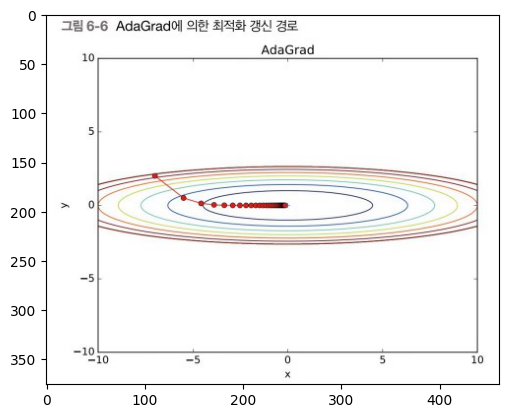

In [23]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/AdaGrad최적화갱신경로.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

최솟값을 향해 효율적으로 이동  
→ y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정됨  
→ y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어듦

### 6.1.6 Adam

- 모멘텀 : 공이 그릇을 구르는 듯한 물리 법칙에 따르는 움직임

- AdaGrad : 매개변수의 원소마다 적응적으로 갱신 정도를 조정

**Adam** : 모멘텀과 Adagrad 기법을 융합한 방법

→ 매개변수 공간을 효율적으로 탐색. 하이터파라미터의 '편향 보정'이 진행됨



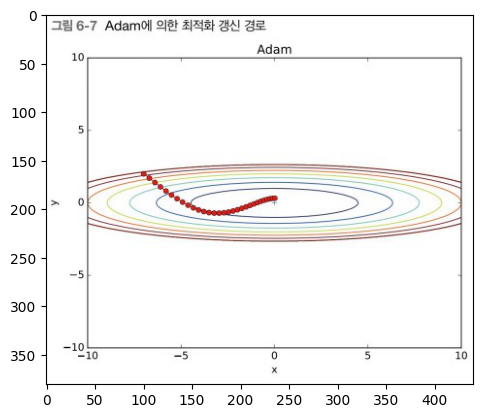

In [25]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/Adam최적화갱신경로.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

Adam 갱신 과정도 그릇 바닥을 구르듯 움직임 (모멘텀과 비슷한 패턴)인데 모멘텀 때보다 공의 좌우 흔들림이 적음  
→ 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택

※ Adam은 하이퍼파라미터 3개 설정  
- 학습률
- 일차 모멘텀용 계수 β1 [default : 0.9]
- 이차 모멘텀용 계수 β2 [default : 0.999]

→ 이 값일 때, 많은 경우에 좋은 결과를 얻을 수 있음

**Adam의 구현**

In [26]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/common/optimizer.py 참고
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

### 6.1.7 어느 갱신 방법을 이용할 것인가?

**네 기법의 결과를 비교**

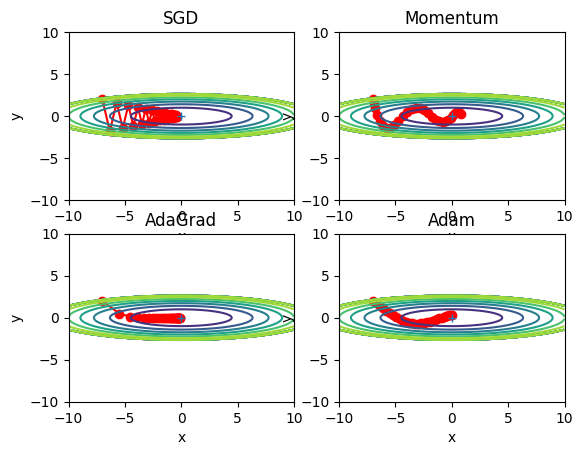

In [ ]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/optimizer_compare_naive.py 참고
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

문제가 무엇이냐에 따라 사용할 기법이 달라짐

하이퍼 파라미터를 어떻게 설정하느냐에 따라서 결과도 바뀜

모든 문제에서 항상 뛰어난 기법은 아직 없음

이 책에서는 SGD, Adam을 많이 사용.

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.344750818653345
Momentum:2.329120178021191
AdaGrad:2.282584873918185
Adam:2.131398630327728
===========iteration:100===========
SGD:1.5533302812020575
Momentum:0.3660322781850947
AdaGrad:0.16701381975563365
Adam:0.33345918553032444
===========iteration:200===========
SGD:0.6988937893619663
Momentum:0.23298545266083073
AdaGrad:0.10363198154369135
Adam:0.19464089697587864
===========iteration:300===========
SGD:0.5119560791914775
Momentum:0.12858389322344907
AdaGrad:0.05016225493342932
Adam:0.09360075528010797
===========iteration:400===========
SGD:0.37887285099279355
Momentum:0.13773429810715346
AdaGrad:0.04419486704673229
Adam:0.10981475195523886
===========iteration:500===========
SGD:0.3344693478414881
Momentum:0.13925065251939434
AdaGrad:0.055676969150842255
Adam:0.10350208561737625
===========iteration:600===========
SGD:0.4479025634873712
Momentum:0.18344388660286332
AdaGrad:0.08638013688329321
Adam:0.11318228583048932
===========iteration:

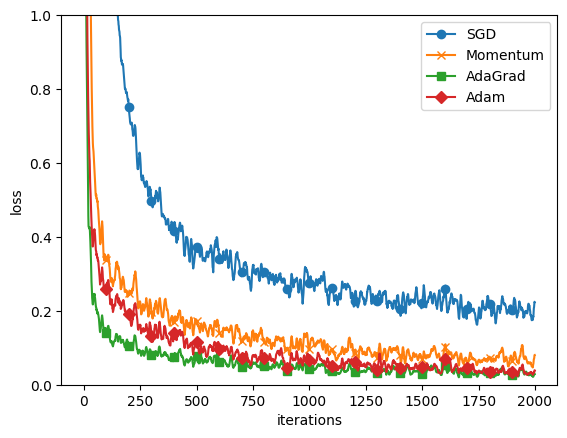

In [28]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/optimizer_compare_mnist.py 참고
# coding: utf-8
#import os
#import sys
#sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
import sys, os
import numpy as np
sys.path.append('/content/drive/My Drive/CUAI_딥러닝/')                 # 구글 드라이브 경로 추가
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
#from common.optimizer import *

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용해 측정

하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라짐

일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높음

## 6.2 가중치의 초깃값

가중치의 초기값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가름

### 6.2.1 초깃값을 0으로 하면?

**가중치 감소(weight decay)**

- 가중치 매개변수 값이 작아지도록 학습하는 방법.
- 가중치 값을 작게 하여 오버피팅이 일어나지 않음.  

초기값을 작게 하기 위해 0.01 * np.random.randn(10,100) 처럼 정규분포로 생성된 값에 0.01을 곱함

**< 초기값을 모두 0으로 해서는 안되는 이유? >**

: 오차역전법에서 모든 가중치의 값이 똑같이 갱신되기 때문

- 순전파 : 입력파의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달
- 역전파 : 가중치가 모두 똑같이 갱신  

→ 가중치가 고르게 되어버리는 상황 막으려면 (= 가중치의 대칭적인 구조를 무너뜨리려면) **초깃값을 무작위로 설정해야함**

### 6.2.2 은닉층의 활성화값 분포

가중치의 초기값에 따라 은닉층 활성화 값들이 어떻게 변화는지 실험

각 층의 활성화값 분포를 히스토그램으로 그림  


In [30]:
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch06/weight_init_activation_histogram.py 참고
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

def get_activation(hidden_layer_size, x, w, a_func=sigmoid):
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        a = np.dot(x, w)

        # 활성화 함수도 바꿔가며 실험해보자！
        z = a_func(a)
        # z = ReLU(a)
        # z = tanh(a)

        activations[i] = z
    return activations
    
# 초깃값을 다양하게 바꿔가며 실험해보자！
w = np.random.randn(node_num, node_num) * 1
# w = np.random.randn(node_num, node_num) * 0.01
# w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
# w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

z = sigmoid
# z = ReLU
# z = tanh

activations = get_activation(hidden_layer_size, x, w, z)

**표준편차가 1인 정규분포의 활성화값들의 분포**

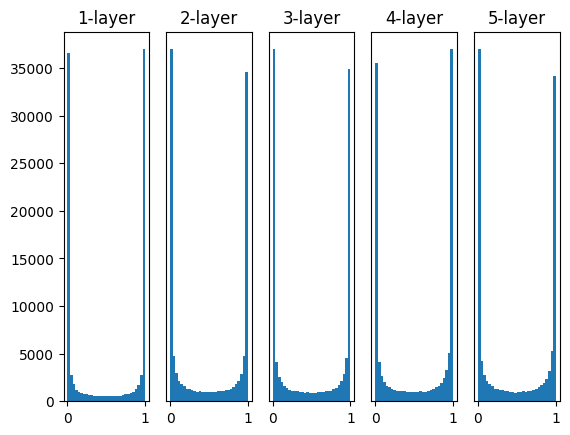

In [ ]:
# 히스토그램 그리기
def get_histogram(activations):
    for i, a in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        if i != 0: plt.yticks([], [])
        # plt.xlim(0.1, 1)
        # plt.ylim(0, 7000)
        plt.hist(a.flatten(), 30, range=(0,1))
    plt.show()

get_histogram(activations)

**기울기 소실(gradient vanishing)**

: 데이터가 0과 1에 치우쳐 분포하게 되면 역전파 기울기 값이 점점 작아지다 사라짐

**가중치의 표준편차를 0.01로 변경**  
→ **가중치를 표준편차가 0.01인 정규분포로 초기화할 때의 각 층의 활성화값 분포**

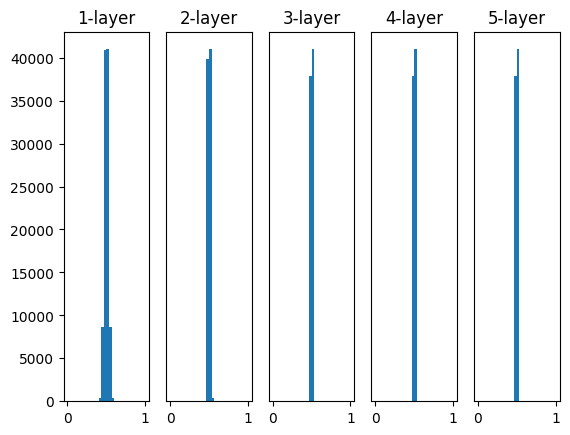

In [ ]:
w = np.random.randn(node_num, node_num) * 0.01
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

0.5 부근에 집중. 활성화값들이 치우쳤다는 것은 표현력 관점에서 큰 문제

→ **표현력을 제한** : 예를 들어 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를게 없음

**Xavier 초기값**

: 앞 계층의 노드가 n개라면 표준편차가 1 / np.sqrt(n)인 정규분포를 사용

- 사비에르 논문은 앞 층의 노드 수 외에 다음 출력 노드 수도 고려한 설정 값 제안.

- 카페 등의 프레임워크는 앞층의 입력 노드만으로 계산하도록 단순화.

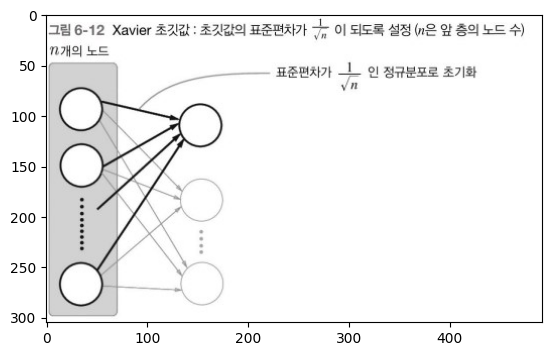

In [31]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_딥러닝/Xavier초깃값.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼짐.

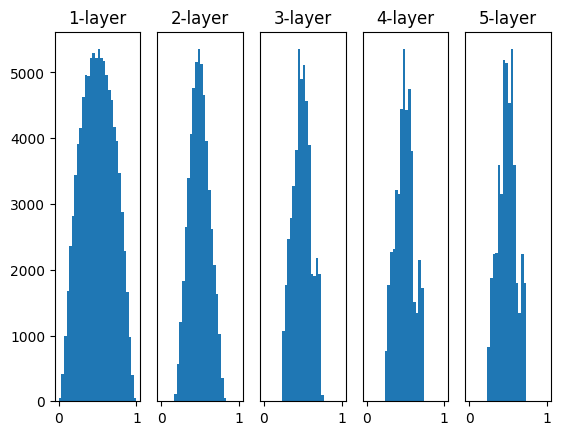

In [ ]:
# Xavier 초기값
w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

층이 깊어지면서 형태가 다소 일그러지지만, 넓게 분포됨

시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것

###6.2.3 ReLU를 사용할 때의 가중치 초깃값

- **sigmoid**, **tanh**는 좌우 대칭이라 **Xavier 초기값**이 적당

**He 초기값** : **ReLU**에 특화된 초기값.
→ 앞 계층의 노드가 n일 때 표준편차가 2 / np.sqrt(n)인 정규분포를 사용

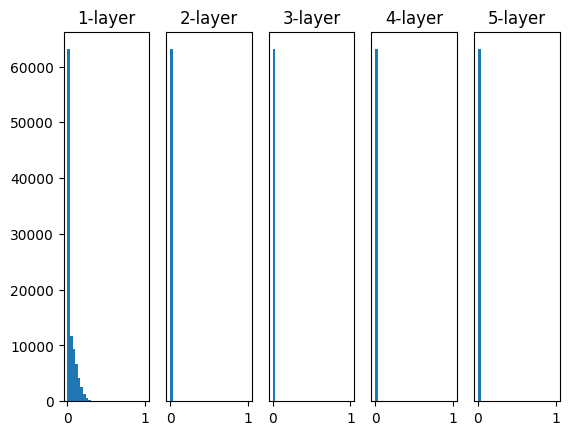

In [ ]:
# 표준편차가 0.01인 정규분포를 가중치 초기값으로 사용한 경우
w = np.random.randn(node_num, node_num) * 0.01
z = ReLU
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

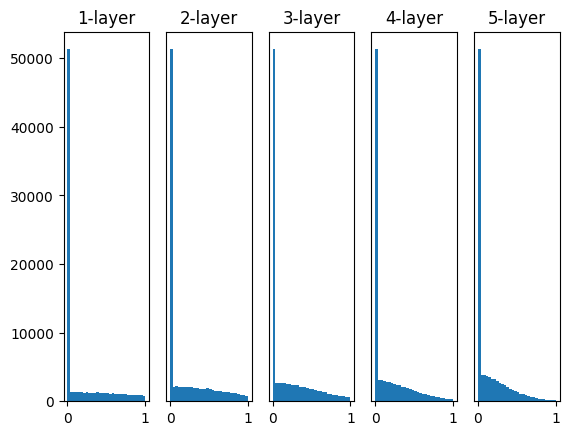

In [ ]:
# Xavier 초기값을 사용한 경우
w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

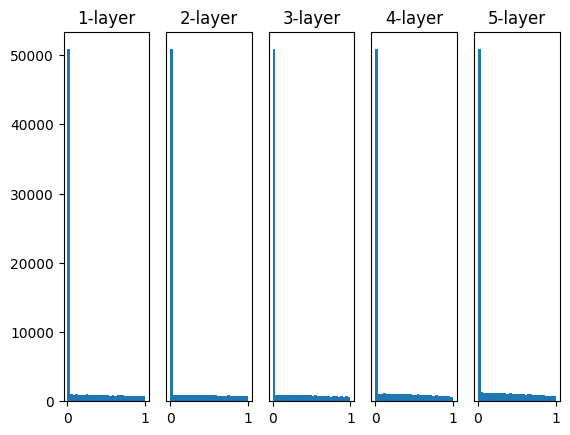

In [ ]:
# He 초기값을 사용한 경우
w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
activations = get_activation(hidden_layer_size, x, w, z)
get_histogram(activations)

- std = 0.01일 때   
: 각 층의 활성화 값들이 아주 작은 값들. 역전파의 가중치의 기울기 역시 작아짐. 실제로 학습이 거의 이뤄지지 않음

- Xavier 초기값일 때  
: 층이 깊어지면 활성화값들이 치우침. 학습할 때 '기울기 소실'문제.

- He 초기값일 때  
: 모든 층에서 균일하게 분포.

**< 실험결과 >**

활성화 함수로 ReLU를 사용할 때 He 초기값.

활성화 함수로 sigmoid, tanh 등 S자 모양 곡선일 때는 Xavier 초기값.

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

실제 데이터로 가중치의 초기값을 주는 방법이 신경망 학습에 얼마나 영향을 주는지 그래프

===========iteration:0===========
std=0.01:2.3025568855416747
Xavier:2.2989408080933447
He:2.3310680039780216
===========iteration:100===========
std=0.01:2.302730110717879
Xavier:2.241541663168724
He:1.524233263534338
===========iteration:200===========
std=0.01:2.3026397427020258
Xavier:2.0972476880437014
He:0.7400991249080193
===========iteration:300===========
std=0.01:2.303457811832706
Xavier:1.7489994527209882
He:0.6548408533594237
===========iteration:400===========
std=0.01:2.3029773930731077
Xavier:1.1607644643093997
He:0.42099613322363516
===========iteration:500===========
std=0.01:2.3017550948205274
Xavier:0.9989084921567641
He:0.3794051714426393
===========iteration:600===========
std=0.01:2.3039568841449958
Xavier:0.831773788005649
He:0.5139390013178476
===========iteration:700===========
std=0.01:2.3007914876521323
Xavier:0.4916272013578665
He:0.2725418635403382
===========iteration:800===========
std=0.01:2.3061988580983828
Xavier:0.500559509119482
He:0.3252901463725737

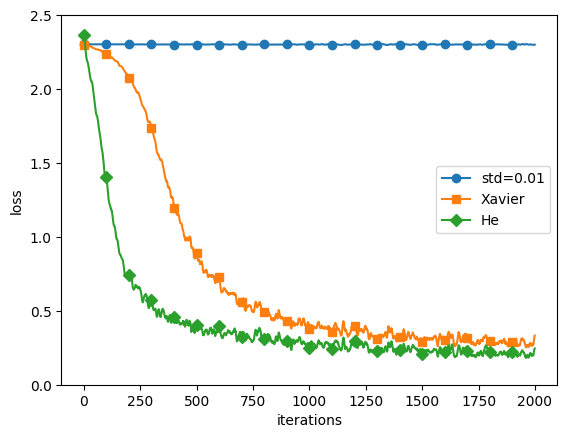

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

sys.path.append('/content/drive/My Drive/CUAI_딥러닝/')                 # 구글 드라이브 경로 추가
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
#from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

층별 뉴런 수가 100개인 5층 신경망에서 활성화 함수로 ReLu를 사용.

표준편차가 0.01일 때 학습이 전혀 이뤄지지 않음

Xaview, He 초기값은 학습이 순조로움. He 초기값이 학습진도가 빠름.